In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from astropy.table import Table
from scipy.optimize import curve_fit

from scipy.stats import binned_statistic_2d

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

ftype = '.pdf'

In [2]:
Gfile = '../data/kepler_dr2_1arcsec.fits' # from http://gaia-kepler.fun, thanks to M. Bedell
data = Table.read(Gfile, format='fits')
gaia = data.to_pandas()
print(gaia.shape)

rot_file = '../data/Table_Periodic.txt'
rot = pd.read_csv(rot_file)
df = pd.merge(rot, gaia, right_on='kepid', left_on='KID')
print(df.shape)

ok = np.where(np.isfinite(df[u'parallax']) & # this is basically the same as the TGAS file...
              (df[u'parallax_error'] < 0.1) &
              (df[u'r_modality_flag'] == 1) & 
              (df[u'r_result_flag'] == 1) &
              np.isfinite(df[u'bp_rp']) & 
              (df[u'phot_bp_mean_flux_error']/df[u'phot_bp_mean_flux'] < 0.01) & 
              (df[u'phot_rp_mean_flux_error']/df[u'phot_rp_mean_flux'] < 0.01) & 
              (df[u'phot_g_mean_flux_error']/df[u'phot_g_mean_flux'] < 0.01))[0]
print(ok.shape)

(195830, 101)
(33538, 112)
(30305,)


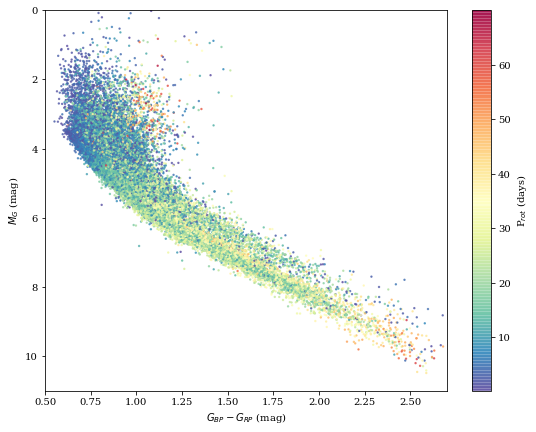

In [3]:
# plt.figure(figsize=(9,7))
cm = plt.cm.get_cmap('Spectral_r')

fig, ax1 = plt.subplots(figsize=(9,7))

plt.scatter(df[u'bp_rp'].values[ok], 
            df[u'phot_g_mean_mag'].values[ok] - 5. * np.log10(df[u'r_est'].values[ok])  + 5, 
            c=(df[u'Prot'].values[ok]), alpha=0.7, s=2, cmap=cm)


plt.ylim(11,0)
plt.xlim(.5,2.7)
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')

cb = plt.colorbar()
cb.set_label('P$_{rot}$ (days)')

# plt.savefig('../figures/cmd'+ftype, dpi=300, bbox_inches='tight', pad_inches=0.25)

In [4]:
cmdbins = [75,100]

/Users/james/anaconda3/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:621: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


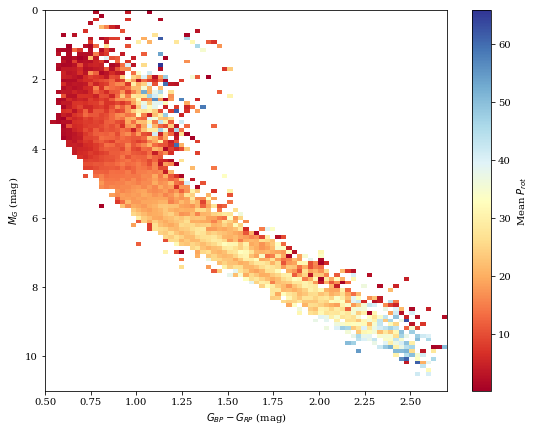

In [5]:
# plt.figure(figsize=(9,7))
cm = plt.cm.get_cmap('Spectral_r')


mper, xe, ye, nper = binned_statistic_2d(df[u'bp_rp'].values[ok], 
                                         df[u'phot_g_mean_mag'].values[ok] - 5. * np.log10(df[u'r_est'].values[ok])  + 5, 
                                         df[u'Prot'].values[ok], 
                                         statistic='mean',range=[[0.5, 2.7],[0, 11]], bins=cmdbins)
plt.figure(figsize=(9,7))
plt.imshow(mper.T, origin='lower', extent=(0.5,2.7,0,11), aspect='auto', cmap=plt.cm.RdYlBu)

cb = plt.colorbar()
cb.set_label(r'Mean $P_{rot}$')

plt.ylim(11,0)
plt.xlim(.5,2.7)
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')

# cb = plt.colorbar()
# cb.set_label('P$_{rot}$ (days)')

plt.savefig('mean_per.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

In [6]:
mper.shape

(75, 100)

In [7]:
nb = np.where(np.isfinite(gaia[u'parallax']) & # this is basically the same as the TGAS file...
              (gaia[u'parallax_error'] < 0.1) &
              (gaia[u'r_modality_flag'] == 1) & 
              (gaia[u'r_result_flag'] == 1) &
              np.isfinite(gaia[u'bp_rp']) & 
              (gaia[u'phot_bp_mean_flux_error']/gaia[u'phot_bp_mean_flux'] < 0.01) & 
              (gaia[u'phot_rp_mean_flux_error']/gaia[u'phot_rp_mean_flux'] < 0.01) & 
              (gaia[u'phot_g_mean_flux_error']/gaia[u'phot_g_mean_flux'] < 0.01))[0]

nb.shape

(180993,)

Text(0,0.5,'$M_G$ (mag)')

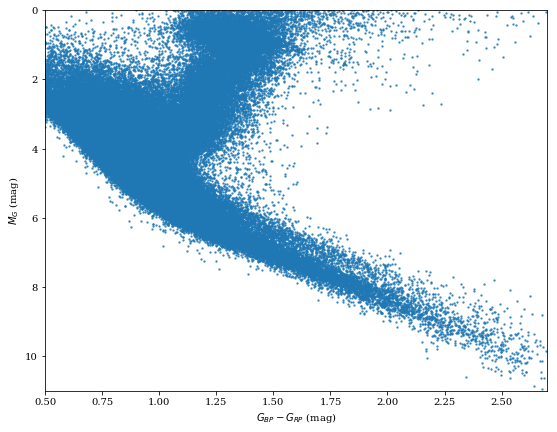

In [8]:
# plt.figure(figsize=(9,7))
cm = plt.cm.get_cmap('Spectral_r')

fig, ax1 = plt.subplots(figsize=(9,7))

plt.scatter(gaia[u'bp_rp'].values[nb], 
            gaia[u'phot_g_mean_mag'].values[nb] - 5. * np.log10(gaia[u'r_est'].values[nb])  + 5, 
            alpha=0.7, s=2, cmap=cm)


plt.ylim(11,0)
plt.xlim(.5,2.7)
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')

# plt.savefig('../figures/cmd'+ftype, dpi=300, bbox_inches='tight', pad_inches=0.25)

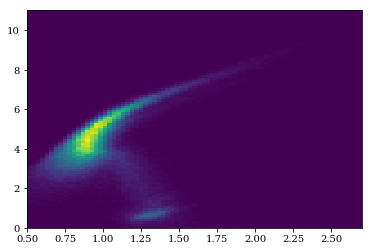

In [9]:
h_all, xe_all, ye_all, im_all = plt.hist2d(gaia[u'bp_rp'].values[nb], 
                                           gaia[u'phot_g_mean_mag'].values[nb] - 5. * np.log10(gaia[u'r_est'].values[nb])  + 5,
                                           range=[[0.5, 2.7],[0, 11]], bins=cmdbins)

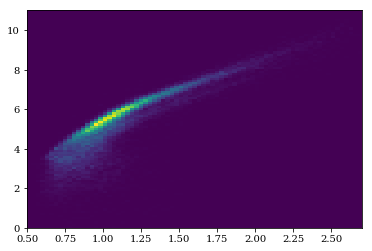

In [10]:
h_rot, xe_rot, ye_rot, im_rot = plt.hist2d(df[u'bp_rp'].values[ok], 
                                           df[u'phot_g_mean_mag'].values[ok] - 5. * np.log10(df[u'r_est'].values[ok])  + 5, 
                                           range=[[0.5, 2.7],[0, 11]], bins=cmdbins)

/Users/james/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


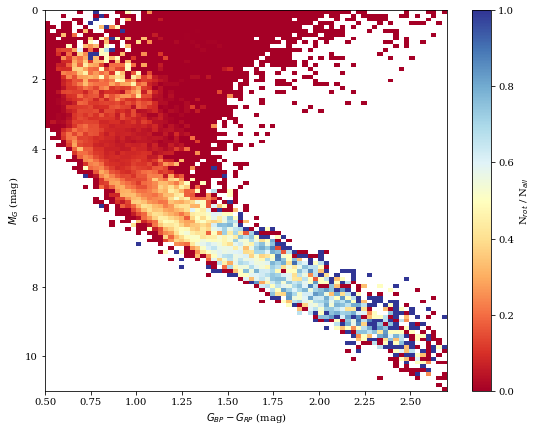

In [11]:
plt.figure(figsize=(9,7))
plt.imshow(h_rot.T/h_all.T, origin='lower', extent=(0.5,2.7,0,11), aspect='auto', cmap=plt.cm.RdYlBu)

plt.ylim(11,0)

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')


cb = plt.colorbar()
cb.set_label(r'N$_{rot}$ / N$_{all}$')
plt.savefig('fraction_rot.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

In [12]:
Nok = np.where((h_all > 10))

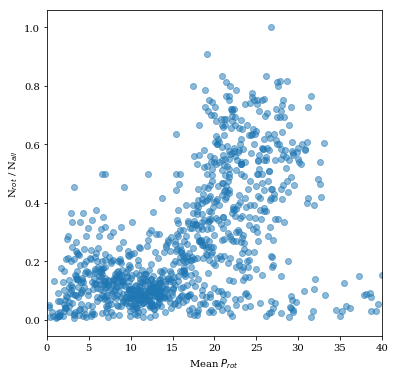

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(mper[Nok], h_rot[Nok]/h_all[Nok], alpha=0.5 )

plt.xlabel('Mean $P_{rot}$')
plt.ylabel('N$_{rot}$ / N$_{all}$')
# plt.xscale('log')
plt.xlim(0,40)
plt.savefig('mean_vs_frac.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

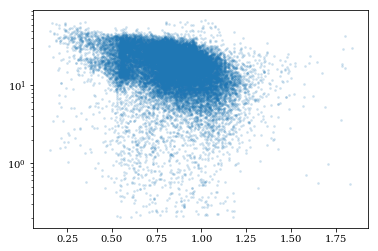

In [14]:
## dump table for D. Flemming's work
flem = np.where((df[u'phot_g_mean_mag'].values[ok] - 5. * np.log10(df[u'r_est'].values[ok])  + 5 > 4) & 
                (df[u'mass'].values[ok] < 2))[0]

df_out = pd.DataFrame(data={'mass':df[u'mass'].values[ok][flem], 
                            'Prot':df['Prot'].values[ok][flem], 
                            'KIC':df['kepid'][ok][flem]})


plt.scatter(df_out['mass'], df_out['Prot'], alpha=0.15, s=3)
plt.yscale('log')


df_out.to_csv('kepler_gaia_clean.csv')